In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import math
import numpy as np
import statistics
import scipy.stats
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model


In [5]:
# Import the data from the spreadsheet
df = pd.read_excel('CommunicationStudySurvey.xlsx')

Descriptive Statistics

In [6]:
# Cornelius



socialness = df['How social would you say you are?']
# Socialness
print("Socialness")
print("Mean", statistics.mean(socialness))
print("SD", statistics.stdev(socialness))
print("Median", statistics.median(socialness))
print("Variance", statistics.variance(socialness))

# Inperson Open

inperson_open = df['How open are you with strangers in person?']


Socialness
Mean 6.6
SD 1.6465452046971292
Median 6.5
Variance 2.7111111111111112


**SIMPLE LINEAR REGRESSION TESTS**

Is there a correlation between time spent on social media and openness with strangers in person?

In [ ]:
# Nolan


Is there a correlation between time spent on social media and openness with strangers online?

In [ ]:
# Nolan

Is there a correlation between self reported socialness and communication comfort levels (in person vs online)

In [ ]:
# Nolan

Does trust in technology impact openness to strangers in person

Does trust in technology impact openness to strangers online

Is there a correlation between multiplayer gaming and openness with strangers on the internet.

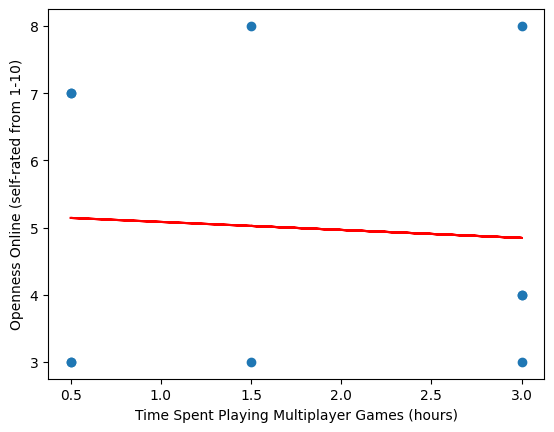

In [9]:
# Anna
# Extracts the data from the dataframe, then converts it to a shape that sklearn can work with
mult = df['How many hours a week do you spend playing multiplayer video games?'].values
openOnline = df['How open are you with strangers online?'].values

mult = mult.reshape(len(mult), 1)
openOnline = openOnline.reshape(len(openOnline), 1)

# Calculates the linear regression
regr = linear_model.LinearRegression()
regr.fit(mult, openOnline)

# Plots the data and line of best fit
plt.scatter(mult, openOnline)
plt.plot(mult, regr.predict(mult), color='red')
plt.xlabel('Time Spent Playing Multiplayer Games (hours)')
plt.ylabel('Openness Online (self-rated from 1-10)')
plt.show()

**MULTIPLE LINEAR REGRESSIONS TESTS**

Does time spent playing video games and on social media impact in-person openness with strangers

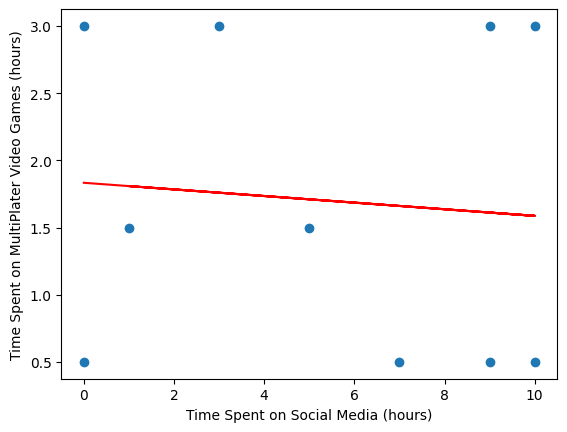

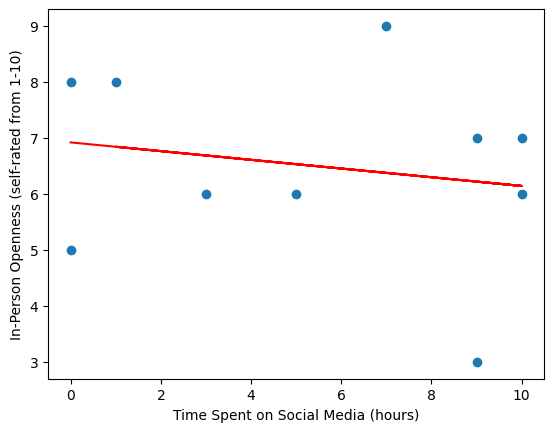

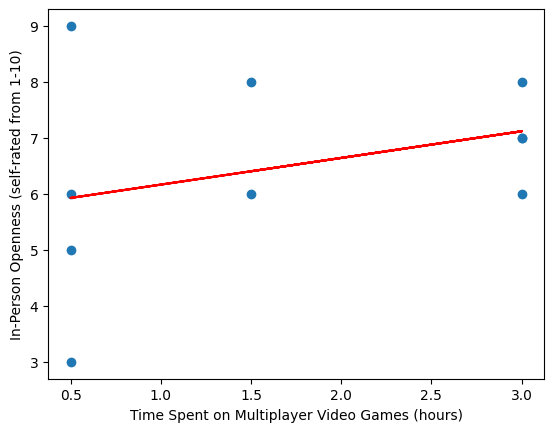

Coefficients:  [-0.06649404  0.45613672]
Intercept:  6.083635422061108

Let's say that someone spends  4  hours on social media a week and  2  hours on multiplayer video gaming. According to our model, we can predict they will rate themselves  6.729932677369239  on their in-person openness.


C:\Users\annal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
sm = df['How many hours a week do you spend on social media?'].values
vg = df['How many hours a week do you spend playing multiplayer video games?'].values
ipOpen = df['How open are you with strangers in person?'].values

sm = sm.reshape(len(sm), 1)
vg = vg.reshape(len(vg), 1)
ipOpen = ipOpen.reshape(len(ipOpen), 1)

regr = linear_model.LinearRegression()

### Plotting graphs to look at relationships between the three variables ###
# Plot the social media vs. video games graph
regr.fit(sm, vg)

plt.scatter(sm, vg)
plt.plot(sm, regr.predict(sm), color='red')
plt.xlabel('Time Spent on Social Media (hours)')
plt.ylabel('Time Spent on MultiPlater Video Games (hours)')
plt.show()

# Plot the social media vs in-person opennnes graph
regr.fit(sm, ipOpen)

plt.scatter(sm, ipOpen)
plt.plot(sm, regr.predict(sm), color='red')
plt.xlabel('Time Spent on Social Media (hours)')
plt.ylabel('In-Person Openness (self-rated from 1-10)')
plt.show()

# Plot the video games vs in-person opennnes graph
regr.fit(vg, ipOpen)

plt.scatter(vg, ipOpen)
plt.plot(vg, regr.predict(vg), color='red')
plt.xlabel('Time Spent on Multiplayer Video Games (hours)')
plt.ylabel('In-Person Openness (self-rated from 1-10)')
plt.show()


x = df[['How many hours a week do you spend on social media?', 'How many hours a week do you spend playing multiplayer video games?']]
y = df['How open are you with strangers in person?']

regr = linear_model.LinearRegression()
regr.fit(x, y)

# Prints the model
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

# Runs an example prediction - given hours on video games and social media, can we predict their openness? 
SMhours = 4   # example - can be changed to produce different results
vgHours = 2   # example

input = [(SMhours, vgHours)]
output = regr.predict(input)
print("\nLet's say that someone spends ", SMhours, " hours on social media a week and ", vgHours, " hours on multiplayer video gaming. According to our model, we can predict they will rate themselves ", output[0], " on their in-person openness.")
